In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Reading/Importing the Data from local

In [60]:
df = pd.read_csv("data/amazon.csv")

In [61]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## Data Characteristic

In [62]:
df.shape

(1465, 16)

##### 1465 Entry with 16 attribute

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

##### We will need to deal with the dtype to be 
##### their appropriate types

In [64]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

##### User ID, and User name are redundant since we can identify with only one of them

##### img_link and product_link will not be used since they are references to the products

In [65]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


##### We will need to clean multiple columns dtype to effectively use .describe()


In [66]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [67]:
df['rating_count'].sort_values(ascending = True)

286      1,001
1376     1,004
1273     1,015
1104     1,017
1123     1,017
         ...  
977     98,250
750        989
1279       992
282        NaN
324        NaN
Name: rating_count, Length: 1465, dtype: object

##### From the above, the NaN value is most likely corrupted value since the their corresponding rating is not empty

In [68]:
df.sort_values(by = 'rating_count',ascending = False)['review_title'].str.split(",").str.len()

1279     8
750      9
977      2
1059     8
151      9
        ..
1273     8
1376     9
286     10
282      1
324      1
Name: review_title, Length: 1465, dtype: int64

In [69]:
df.sort_values(by = 'rating_count',ascending = False)['review_content'].str.split(",").str.len()

1279    25
750      9
977     51
1059    10
151     12
        ..
1273    11
1376     9
286     19
282      2
324      1
Name: review_content, Length: 1465, dtype: int64

In [70]:
len(df[df.sort_values(by = 'rating_count',ascending = False)['review_id'].str.split(",").str.len() > df.sort_values(by = 'rating_count',ascending = False)['review_title'].str.split(",").str.len()])

0

##### Looks like the review_title columns contain multiple reviews title seperated by ',' by multiple reviewers which are also seperated by ','

In [71]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


##### We should split and remove redundant keyword from the categories of item -> This may be useful for association mining or model

In [72]:
df['category'][0]

'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'

In [73]:
df.loc[df['category'].str.split("|").str.contains("Accessories",regex=False)]['category'].str.split("|")

12     [Electronics, HomeTheater,TV&Video, Accessorie...
21     [Electronics, HomeTheater,TV&Video, Accessorie...
25     [Electronics, HomeTheater,TV&Video, Accessorie...
47     [Electronics, HomeTheater,TV&Video, Accessorie...
48     [Electronics, HomeTheater,TV&Video, Accessorie...
                             ...                        
831    [Electronics, Cameras&Photography, Accessories...
847    [Electronics, Cameras&Photography, Accessories...
864     [Electronics, Accessories, MemoryCards, MicroSD]
949    [Electronics, Cameras&Photography, Accessories...
961    [Electronics, Cameras&Photography, Accessories...
Name: category, Length: 111, dtype: object

In [74]:
test = df['category'].str.split("[\|\&]").apply(lambda x: list(set(x)))
test[test.str.contains("Accessories", regex = False)]

0       [Computers, Accessories, Peripherals, USBCable...
1       [Computers, Accessories, Peripherals, USBCable...
2       [Computers, Accessories, Peripherals, USBCable...
3       [Computers, Accessories, Peripherals, USBCable...
4       [Computers, Accessories, Peripherals, USBCable...
                              ...                        
1447    [DryIrons, Kitchen, Irons,Steamers, Accessorie...
1449    [Kitchen, WaterPurifiers, Accessories, HomeApp...
1454    [Kitchen, EmbroideryMachines, SewingMachines, ...
1459    [Kitchen, Irons,Steamers, LintShavers, Accesso...
1460    [Kitchen, WaterPurifiers, Accessories, HomeApp...
Name: category, Length: 882, dtype: object

##### For categories, we can see that some of them are overlapping, eg. Home&Kitchen and Kitchen&HomeApplicances

In [75]:
df['user_id'][0]

'AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ'

In [76]:
test2 = df['user_id'].str.split(",").str.len()
test2

0       8
1       8
2       8
3       8
4       8
       ..
1460    8
1461    8
1462    8
1463    8
1464    8
Name: user_id, Length: 1465, dtype: int64

In [77]:
test2.loc[test2 > 8]

Series([], Name: user_id, dtype: int64)

##### Seem like the user_id who bought the product is capped at 8 users, so this might not provide the overall big picture, but we can still try to infer the association of the items

In [78]:
df[df['rating_count'].isna()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


##### Since the null value is presented in 2 entry in columns rating_count; we can't really fill the rating count this way; There is also only one reviewer in each of the items; We should drop it as it should not deviate our result

## Let's enact some of the adjustment that we mention above (Feature engineering)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

###### product_id, product_name, about_product will be change into string data type
###### category, user_id, user_name, review_id, review_title, review_content will be change into list of string
###### discounted_price, actual_price, discount_percentage, rating, rating_count will be change into float64 data type

In [80]:
df = df.drop(df[df['rating'].str.contains("\|")].index)
df= df.dropna(subset='rating_count')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [81]:
text_attr = ['product_id','product_name','about_product']
list_attr = ['category','user_id','user_name','review_id','review_title','review_content']
float_attr = ['discounted_price','actual_price','discount_percentage','rating','rating_count']

df[text_attr] = df[text_attr].astype('string')
df[list_attr] = df[list_attr].apply(lambda x: x.str.split("[\|\,]"))
for attr in float_attr:
    df[attr] = df[attr].apply(lambda x:x.replace("₹","").replace(",","").replace("%","")).astype('float')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,"[Computers&Accessories, Accessories&Peripheral...",399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"[AG3D6O4STAQKAY2UVGEUV46KN35Q, AHMY5CWJMMK5BJR...","[Manav, Adarsh gupta, Sundeep, S.Sayeed Ahmed,...","[R3HXWT0LRP0NMF, R2AJM3LFTLZHFO, R6AQJGUP6P86,...","[Satisfied, Charging is really fast, Value for...",[Looks durable Charging is fine tooNo complain...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,"[Computers&Accessories, Accessories&Peripheral...",199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","[AECPFYFQVRUWC3KGNLJIOREFP5LQ, AGYYVPDD7YG7FYN...","[ArdKn, Nirbhay kumar, Sagar Viswanathan, Asp,...","[RGIQEG07R9HS2, R1SMWZQ86XIN8U, R2J3Y1WL29GWDE...","[A Good Braided Cable for Your Type C Device, ...",[I ordered this cable to connect my phone to A...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,"[Computers&Accessories, Accessories&Peripheral...",199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"[AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA, AESFLDV2PT363T2...","[Kunal, Himanshu, viswanath, sai niharka, saqi...","[R3J3EQQ9TZI5ZJ, R3E7WBGK7ID0KV, RWU79XKQ6I1QF...","[Good speed for earlier versions, Good Product...","[Not quite durable and sturdy, https://m.media...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,"[Computers&Accessories, Accessories&Peripheral...",329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"[AEWAZDZZJLQUYVOVGBEUKSLXHQ5A, AG5HTSFRRE6NL3M...","[Omkar dhale, JD, HEMALATHA, Ajwadh a., amar s...","[R3EEUZKKK9J36I, R3HJVYCLYOY554, REDECAZ7AMPQC...","[Good product, Good one, Nice, Really nice pro...","[Good product, long wire, Charges good, Nice, ...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,"[Computers&Accessories, Accessories&Peripheral...",154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"[AE3Q6KSUK5P75D5HFYHCRAOLODSA, AFUGIFH5ZAFXRDS...","[rahuls6099, Swasat Borah, Ajay Wadke, Pranali...","[R1BP4L2HH9TFUP, R16PVJEXKV6QZS, R2UPDB81N66T4...","[As good as original, Decent, Good one for sec...","[Bought this instead of original apple, does ...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   string 
 1   product_name         1462 non-null   string 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   string 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

#### Create main and sub category from the category column

In [83]:
df['main_category'] = df['category'].str[0].astype("string")
df['sub_category'] = df['category'].str[-1].astype("string")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,sub_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,"[Computers&Accessories, Accessories&Peripheral...",399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"[AG3D6O4STAQKAY2UVGEUV46KN35Q, AHMY5CWJMMK5BJR...","[Manav, Adarsh gupta, Sundeep, S.Sayeed Ahmed,...","[R3HXWT0LRP0NMF, R2AJM3LFTLZHFO, R6AQJGUP6P86,...","[Satisfied, Charging is really fast, Value for...",[Looks durable Charging is fine tooNo complain...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,"[Computers&Accessories, Accessories&Peripheral...",199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","[AECPFYFQVRUWC3KGNLJIOREFP5LQ, AGYYVPDD7YG7FYN...","[ArdKn, Nirbhay kumar, Sagar Viswanathan, Asp,...","[RGIQEG07R9HS2, R1SMWZQ86XIN8U, R2J3Y1WL29GWDE...","[A Good Braided Cable for Your Type C Device, ...",[I ordered this cable to connect my phone to A...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,"[Computers&Accessories, Accessories&Peripheral...",199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"[AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA, AESFLDV2PT363T2...","[Kunal, Himanshu, viswanath, sai niharka, saqi...","[R3J3EQQ9TZI5ZJ, R3E7WBGK7ID0KV, RWU79XKQ6I1QF...","[Good speed for earlier versions, Good Product...","[Not quite durable and sturdy, https://m.media...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,USBCables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,"[Computers&Accessories, Accessories&Peripheral...",329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"[AEWAZDZZJLQUYVOVGBEUKSLXHQ5A, AG5HTSFRRE6NL3M...","[Omkar dhale, JD, HEMALATHA, Ajwadh a., amar s...","[R3EEUZKKK9J36I, R3HJVYCLYOY554, REDECAZ7AMPQC...","[Good product, Good one, Nice, Really nice pro...","[Good product, long wire, Charges good, Nice, ...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,USBCables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,"[Computers&Accessories, Accessories&Peripheral...",154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"[AE3Q6KSUK5P75D5HFYHCRAOLODSA, AFUGIFH5ZAFXRDS...","[rahuls6099, Swasat Borah, Ajay Wadke, Pranali...","[R1BP4L2HH9TFUP, R16PVJEXKV6QZS, R2UPDB81N66T4...","[As good as original, Decent, Good one for sec...","[Bought this instead of original apple, does ...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,USBCables


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   string 
 1   product_name         1462 non-null   string 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   string 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

#### Then we create a weighted rating -> this signifies how much the product is valued by customers

In [85]:
df['weighted_rating'] = df['rating']*df['rating_count']

## Let's try visualizing some of the data based on category, rating

##### Firstly, we can notice that the first and last elements of the list in category is the most important one, where the first one is the big category(ELectronics, Kitchen) and the last one is the specific type of product(USBCable)

In [86]:
df.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,sub_category,weighted_rating
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,"[Computers&Accessories, Accessories&Peripheral...",399.00,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"[AG3D6O4STAQKAY2UVGEUV46KN35Q, AHMY5CWJMMK5BJR...","[Manav, Adarsh gupta, Sundeep, S.Sayeed Ahmed,...","[R3HXWT0LRP0NMF, R2AJM3LFTLZHFO, R6AQJGUP6P86,...","[Satisfied, Charging is really fast, Value for...",[Looks durable Charging is fine tooNo complain...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,USBCables,101929.8
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,"[Computers&Accessories, Accessories&Peripheral...",199.00,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","[AECPFYFQVRUWC3KGNLJIOREFP5LQ, AGYYVPDD7YG7FYN...","[ArdKn, Nirbhay kumar, Sagar Viswanathan, Asp,...","[RGIQEG07R9HS2, R1SMWZQ86XIN8U, R2J3Y1WL29GWDE...","[A Good Braided Cable for Your Type C Device, ...",[I ordered this cable to connect my phone to A...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,USBCables,175976.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,"[Computers&Accessories, Accessories&Peripheral...",199.00,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"[AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA, AESFLDV2PT363T2...","[Kunal, Himanshu, viswanath, sai niharka, saqi...","[R3J3EQQ9TZI5ZJ, R3E7WBGK7ID0KV, RWU79XKQ6I1QF...","[Good speed for earlier versions, Good Product...","[Not quite durable and sturdy, https://m.media...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,USBCables,30919.2
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,"[Computers&Accessories, Accessories&Peripheral...",329.00,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"[AEWAZDZZJLQUYVOVGBEUKSLXHQ5A, AG5HTSFRRE6NL3M...","[Omkar dhale, JD, HEMALATHA, Ajwadh a., amar s...","[R3EEUZKKK9J36I, R3HJVYCLYOY554, REDECAZ7AMPQC...","[Good product, Good one, Nice, Really nice pro...","[Good product, long wire, Charges good, Nice, ...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,USBCables,396324.6
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,"[Computers&Accessories, Accessories&Peripheral...",154.00,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"[AE3Q6KSUK5P75D5HFYHCRAOLODSA, AFUGIFH5ZAFXRDS...","[rahuls6099, Swasat Borah, Ajay Wadke, Pranali...","[R1BP4L2HH9TFUP, R16PVJEXKV6QZS, R2UPDB81N66T4...","[As good as original, Decent, Good one for sec...","[Bought this instead of original apple, does ...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,USBCables,71001.0
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,"[Computers&Accessories, Accessories&Peripheral...",149.00,1000.0,85.0,3.9,24871.0,Fast Charging & Data Sync: Solero TB301 Type-C...,"[AEQ2YMXSZWEOHK2EHTNLOS56YTZQ, AGRVINWECNY7323...","[Jayesh, Rajesh k., Soopy, amazon customer, Am...","[R7S8ANNSDPR40, R3CLZFLHVJU26P, RFF7U7MPQFUGR,...","[It's pretty good, Average quality, very good ...","[It's a good product., Like, Very good item st...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...,Computers&Accessories,USBCables,96996.9
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...","[Computers&Accessories, Accessories&Peripheral...",176.63,499.0,65.0,4.1,15188.0,It Ensures High Speed Transmission And Cha

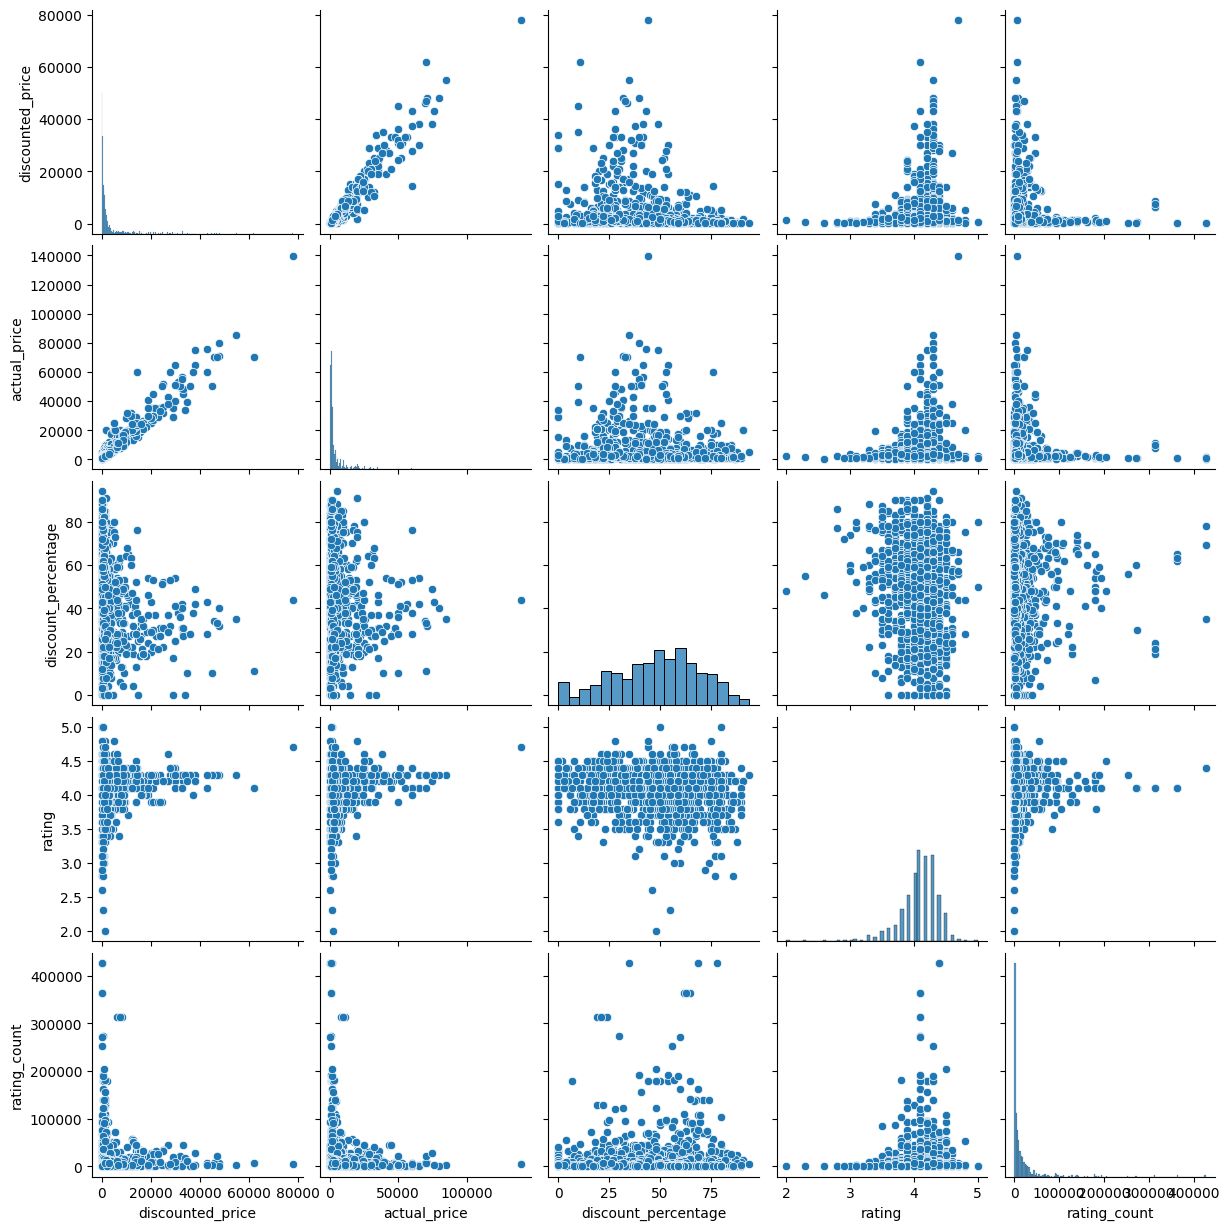

In [87]:
sns.pairplot(df,vars = float_attr)

In [88]:
nume_col = df[float_attr]
correlation_mat = nume_col.corr()
correlation_mat

,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.961910,-0.242298,0.121132,-0.027304
actual_price,0.961910,1.000000,-0.117855,0.122467,-0.036215
discount_percentage,-0.242298,-0.117855,1.000000,-0.155679,0.011294
rating,0.121132,0.122467,-0.155679,1.000000,0.102235
rating_count,-0.027304,-0.036215,0.011294,0.102235,1.000000


<Axes: >

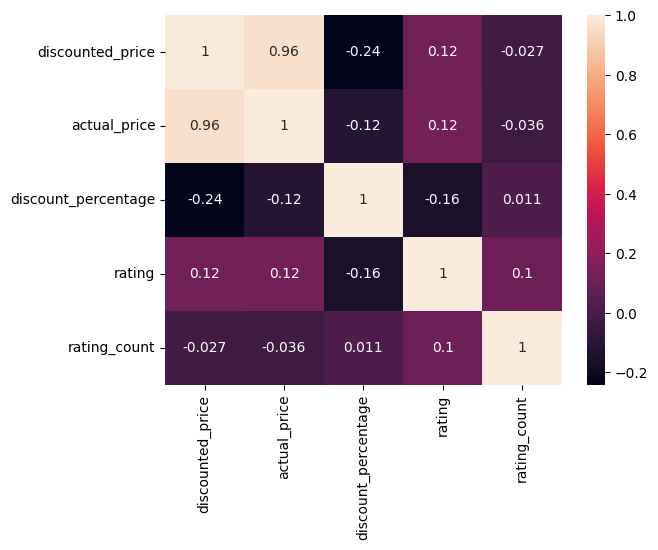

In [89]:
sns.heatmap(correlation_mat,annot=True)

In [90]:
main_cat_df = df.groupby("main_category").agg({'product_name':'count','rating':'mean','rating_count':'sum'})
main_cat_df = main_cat_df.rename(columns = {"product_name":"product_count","rating_count":"total_rater"}).sort_values(by='product_count',ascending = False)
main_cat_df

,product_count,rating,total_rater
main_category,,,
Electronics,526,4.081749,15778848.0
Computers&Accessories,451,4.155654,7728689.0
Home&Kitchen,447,4.040716,2990077.0
OfficeProducts,31,4.309677,149675.0
HomeImprovement,2,4.250000,8566.0
MusicalInstruments,2,3.900000,88882.0
Car&Motorbike,1,3.800000,1118.0
Health&PersonalCare,1,4.000000,3663.0
Toys&Games,1,4.300000,15867.0


<Axes: xlabel='product_count', ylabel='main_category'>

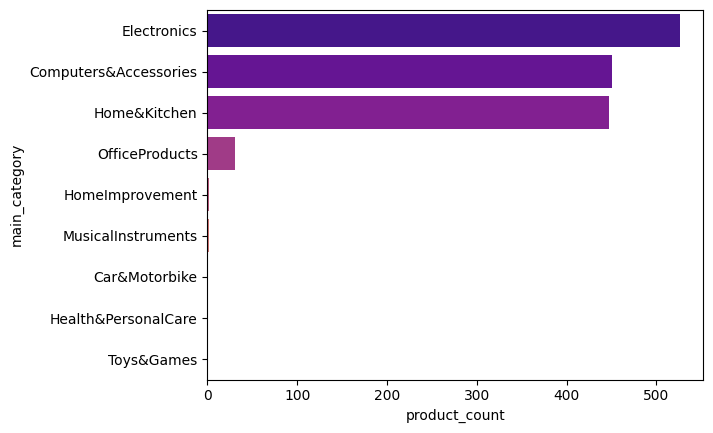

In [91]:
sns.barplot(main_cat_df['product_count'],palette='plasma',orient='h')

<Axes: xlabel='total_rater', ylabel='main_category'>

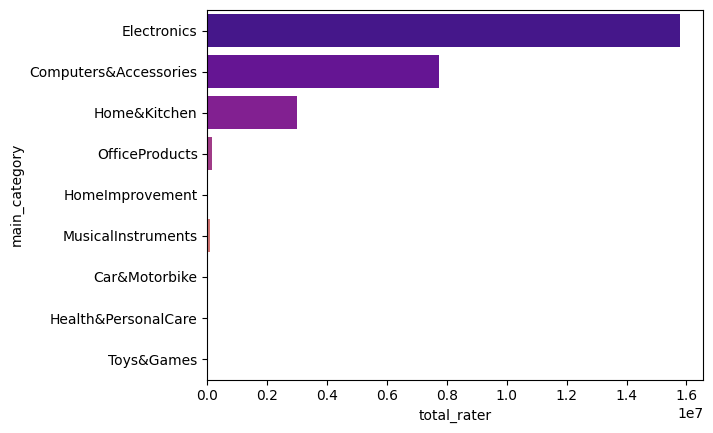

In [92]:
sns.barplot(main_cat_df['total_rater'],palette='plasma',orient='h')

<Axes: xlabel='rating', ylabel='main_category'>

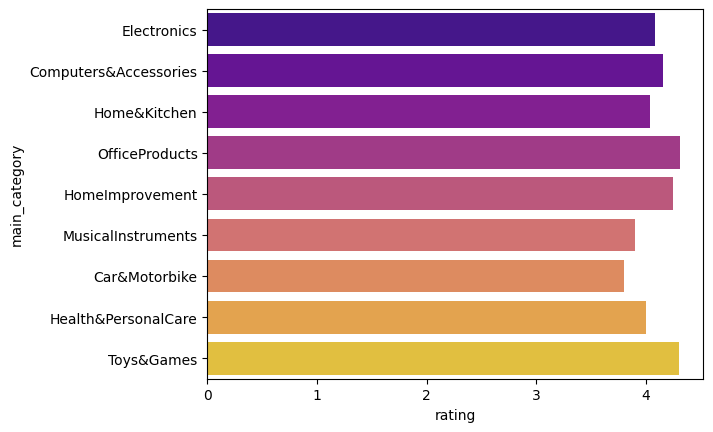

In [93]:
sns.barplot(main_cat_df['rating'],palette='plasma',orient='h')

In [94]:
sub_cat_df = df.groupby("sub_category").agg({'product_name':'count','rating':'mean','rating_count':'sum'})
sub_cat_df = sub_cat_df.rename(columns = {"product_name":"product_count","rating_count":"total_rater"}).sort_values(by='product_count',ascending = False)
sub_cat_df

,product_count,rating,total_rater
sub_category,,,
USBCables,231,4.153247,3547816.0
SmartWatches,76,4.025000,1644476.0
Smartphones,68,4.100000,2493269.0
SmartTelevisions,63,4.209524,760279.0
In-Ear,52,3.898077,4204939.0
...,...,...,...
InkjetInkRefills&Kits,1,4.300000,1367.0
HandlebarMounts,1,4.300000,1193.0
HandheldBags,1,4.300000,2664.0


In [95]:
df['user_id']

0       [AG3D6O4STAQKAY2UVGEUV46KN35Q, AHMY5CWJMMK5BJR...
1       [AECPFYFQVRUWC3KGNLJIOREFP5LQ, AGYYVPDD7YG7FYN...
2       [AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA, AESFLDV2PT363T2...
3       [AEWAZDZZJLQUYVOVGBEUKSLXHQ5A, AG5HTSFRRE6NL3M...
4       [AE3Q6KSUK5P75D5HFYHCRAOLODSA, AFUGIFH5ZAFXRDS...
                              ...                        
1460    [AHITFY6AHALOFOHOZEOC6XBP4FEA, AFRABBODZJZQB6Z...
1461    [AFG5FM3NEMOL6BNFRV2NK5FNJCHQ, AGEINTRN6Z563RM...
1462    [AGVPWCMAHYQWJOQKMUJN4DW3KM5Q, AF4Q3E66MY4SR7Y...
1463    [AF2JQCLSCY3QJATWUNNHUSVUPNQQ, AFDMLUXC5LS5RXD...
1464    [AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA, AG7QNJ2SCS5VS5V...
Name: user_id, Length: 1462, dtype: object

In [97]:
explode_df = df[['product_id','sub_category','user_id']].explode('user_id').drop_duplicates()
explode_df

,product_id,sub_category,user_id
0,B07JW9H4J1,USBCables,AG3D6O4STAQKAY2UVGEUV46KN35Q
0,B07JW9H4J1,USBCables,AHMY5CWJMMK5BJRBBSNLYT3ONILA
0,B07JW9H4J1,USBCables,AHCTC6ULH4XB6YHDY6PCH2R772LQ
0,B07JW9H4J1,USBCables,AGYHHIERNXKA6P5T7CZLXKVPT7IQ
0,B07JW9H4J1,USBCables,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q
...,...,...,...
1464,B01486F4G6,SandwichMakers,AHXCDNSXAESERITAFELQABFVNLCA
1464,B01486F4G6,SandwichMakers,AGRZD6CHLCUNOLMMIMIHUCG7PIFA
1464,B01486F4G6,SandwichMakers,AFQZVGSOSOJHKFQQMCEI4725QEKQ
1464,B01486F4G6,SandwichMakers,AEALVGXXIP46OZVXKRUXSDWZJMEA


In [105]:
asso_df = explode_df.groupby('user_id').agg({"product_id":list,"sub_category":list})
asso_df['sub_category'] = asso_df['sub_category'].apply(lambda x:list(set(x)))
asso_df = asso_df[asso_df['sub_category'].apply(len) > 1]
asso_df

,product_id,sub_category
user_id,,
AE3MQNNHHLUHXURL5S7IAR7JTGNQ,"[B08CF3B7N1, B07MSLTW8Z]","[USBCables, Lapdesks]"
AE3PNBPHVSOFM6ZFHRN65BJ623WA,"[B088ZTJT2R, B09Y5FZK9N]","[Kettle&ToasterSets, ImmersionRods]"
AE4755NP2P2WIA3W6UZ4GBQUMYJQ,"[B09RMQYHLH, B09LMMFW3S]","[Smartphones, MilkFrothers]"
AE4ENCSAVBVYJVFC3GMNMRDSD2KA,"[B0148NPH9I, B07R99NBVB]","[CordManagement, Keyboards]"
AE4FRP3D6KIQG7H3GP436GUD52VQ,"[B07KCMR8D6, B07JB2Y4SR]","[Pens, GelInkRollerballPens]"
...,...,...
AHWVJOF4IVRKFY6RJRSBQ2L6ZXQA,"[B07VSG5SXZ, B06XR9PR5X]","[Adapters, HDMICables]"
AHXQK2APPFORQPV6E43FW2W6DVVQ,"[B0993BB11X, B09MZCQYHZ, B08TDJNM3G]","[PowerBanks, Lamps]"
AHYCGGRP7XQVIYP6NRVZI6A7FH2A,"[B07WHS7MZ1, B01J0XWYKQ]","[Mice, Smartphones]"


#### Now we have an dataframe that is ready to be used for association mining(we have unique user name, list of product and list of subcategory)

In [99]:
# Use preprocessing from mlxtend to Encode the sub_category for use in apriori
a = TransactionEncoder()
data_to_encode = list(asso_df['sub_category'])
a_data = a.fit(data_to_encode).transform(data_to_encode)
aprio_df = pd.DataFrame(a_data,columns = a.columns_)
aprio_df = aprio_df.replace(False,0).replace(True,1)
aprio_df


,AVReceivers&Amplifiers,Adapters,Adapters&Multi-Outlets,AirFryers,AutomobileChargers,BasicCases,BasicMobiles,BatteryChargers,BluetoothAdapters,BottledInk,...,VideoCameras,WallChargers,WaterCartridges,WaterFilters&Purifiers,WaterPurifierAccessories,Webcams,Wet-DryVacuums,WireboundNotebooks,WirelessUSBAdapters,WritingPads&Diaries
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
aprio_rules = apriori(aprio_df, min_support = 0.005,use_colnames = True, verbose = 1)
aprio_rules

Processing 5 combinations | Sampling itemset size 5 4 3


,support,itemsets
0,0.005025,(AVReceivers&Amplifiers)
1,0.005025,(Adapters)
2,0.010050,(Adapters&Multi-Outlets)
3,0.005025,(AirFryers)
4,0.005025,(AutomobileChargers)
...,...,...
357,0.005025,"(In-Ear, USBCables, ExternalHardDisks, PenDrives)"
358,0.005025,"(In-Ear, USBCables, ExternalHardDisks, SteamIr..."
359,0.005025,"(PenDrives, USBCables, ExternalHardDisks, Stea..."
360,0.005025,"(PenDrives, In-Ear, USBCables, SteamIrons)"


In [101]:
asso_rules = association_rules(aprio_rules,metric = 'confidence',min_threshold = 0.3)
asso_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(AVReceivers&Amplifiers),(SmartWatches),0.005025,0.045226,0.005025,1.0,22.111111,0.004798,inf,0.959596
1,(Adapters),(HDMICables),0.005025,0.030151,0.005025,1.0,33.166667,0.004874,inf,0.974747
2,(Adapters&Multi-Outlets),(MixerGrinders),0.010050,0.035176,0.005025,0.5,14.214286,0.004672,1.929648,0.939086
3,(Adapters&Multi-Outlets),(PenDrives),0.010050,0.035176,0.005025,0.5,14.214286,0.004672,1.929648,0.939086
4,(AirFryers),(ElectricKettles),0.005025,0.020101,0.005025,1.0,49.750000,0.004924,inf,0.984848
...,...,...,...,...,...,...,...,...,...,...
340,"(USBCables, SteamIrons)","(In-Ear, ExternalHardDisks, PenDrives)",0.005025,0.005025,0.005025,1.0,199.000000,0.005000,inf,1.000000
341,"(USBCables, PenDrives)","(In-Ear, ExternalHardDisks, SteamIrons)",0.005025,0.005025,0.005025,1.0,199.000000,0.005000,inf,1.000000
342,"(ExternalHardDisks, SteamIrons)","(In-Ear, USBCables, PenDrives)",0.005025,0.005025,0.005025,1.0,199.000000,0.005000,inf,1.000000
343,"(ExternalHardDisks, PenDrives)","(In-Ear, USBCables, SteamIrons)",0.005025,0.005025,0.005025,1.0,199.000000,0.005000,inf,1.000000


In [102]:
def association_recommender(sub_category,rules=asso_rules, rec_count=3, data = df):
    sorted_rules = rules.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in sorted_rules["antecedents"].items():
        for j in list(product):
            if j == sub_category:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])
    if len(recommendation_list) > 1:
        recommended_items = df[df['sub_category'].isin(recommendation_list)].sort_values(by='weighted_rating',ascending = False)[['product_id','product_name','about_product','actual_price','discounted_price','rating','img_link','product_link']]
    else: recommended_items = df[df['sub_category'] == sub_category].sort_values(by='weighted_rating',ascending = False)[['product_id','product_name','about_product','actual_price','discounted_price','rating','img_link','product_link']]
    return recommended_items.iloc[0:rec_count,:]

In [103]:
association_recommender("USBCables",rec_count = 3)

,product_id,product_name,about_product,actual_price,discounted_price,rating,img_link,product_link
47,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",Please select appropriate display resolution &...,475.0,309.0,4.4,https://m.media-amazon.com/images/I/41bCxnHksn...,https://www.amazon.in/AmazonBasics-High-Speed-...
65,B014I8SX4Y,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",HDMI A Male to A Male Cable: Supports Ethernet...,1400.0,309.0,4.4,https://m.media-amazon.com/images/I/41eJqkFjCR...,https://www.amazon.in/AmazonBasics-High-Speed-...
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Flexible, lightweight HDMI cable for connectin...",700.0,219.0,4.4,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...
